# The Captivity Chronicles

## Digital Humanities 150 Advanced Topics in Digital Humanities: Mediterranean Pirates: Perceptions Past and Present through Computational Text Analysis with Professor Sanders at UCLA Winter 2022

### Crystal Huynh, Fontanna Yee, Kedaar Sridhar, Kristina Thabet, Lana Garrett

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import vader
nltk.download('vader_lexicon')
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from wordcloud import WordCloud
from nltk import tokenize

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sia = vader.SentimentIntensityAnalyzer()

## Maria Martin Text - Sentiment Analysis

In [3]:
#open text file in read mode
maria_file = open('Maria Martin.txt', "r")
 
#read whole file to a string
maria = maria_file.read()
 
#close file
maria_file.close()
 
#print(maria)

In [4]:
# Maria Martin text polarity score
sia.polarity_scores(maria)

{'neg': 0.101, 'neu': 0.799, 'pos': 0.1, 'compound': -0.9894}

In [5]:
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(maria.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
maria_df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

# Purge weird words
maria_df = maria_df.drop(maria_df.index[[0,5,16,19,21,23,340,1641]])
#maria_df[:30]

In [6]:
# Sentiment value of each word
k = 0
mariawordlist = []
mariawords_sentiments = []
for index, row in maria_df.iterrows():
    word = maria_df["wordlist"].iloc[k]
    mariawords_sentiments.append(sia.polarity_scores(word)["compound"])
    mariawordlist.append(word)
    k+=1

mariawords_sentiments_df = pd.DataFrame({'wordlist':mariawordlist, 'wordsent':mariawords_sentiments})
#mariawords_sentiments_df[:30]

In [7]:
# Find the most polarizing words - negative and positive
k = 0
mariapos_words = []
marianeg_words = []
mariapos_word_sentiments = []
marianeg_word_sentiments = []
for index, row in mariawords_sentiments_df.iterrows():
    word = mariawords_sentiments_df["wordlist"].iloc[k]
    if mariawords_sentiments_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        mariapos_word_sentiments.append(sia.polarity_scores(word)["compound"])
        mariapos_words.append(word)
        #print("The most positive words are:")
    elif mariawords_sentiments_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        marianeg_word_sentiments.append(sia.polarity_scores(word)["compound"])
        marianeg_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
mariapos_df = pd.DataFrame({'wordlist':mariapos_words, 'wordsent':mariapos_word_sentiments})
mariapos_df = mariapos_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (mariapos_df[:30])
marianeg_df = pd.DataFrame({'wordlist':marianeg_words, 'wordsent':marianeg_word_sentiments})
marianeg_df = marianeg_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (marianeg_df[:30])

The positive words are:
      wordlist  wordsent
11        best    0.6369
8     paradise    0.6369
2     greatest    0.6369
29        love    0.6369
0        great    0.6249
33     delight    0.5994
32       lover    0.5859
30     heroism    0.5859
23      beauty    0.5859
12         joy    0.5859
17   excellent    0.5719
19     success    0.5719
10       happy    0.5719
1     pleasure    0.5719
24   happiness    0.5574
31    gracious    0.5574
28     happily    0.5574
34   enjoyment    0.5574
26       glory    0.5423
20       peace    0.5423
25       merry    0.5423
14   amazement    0.5423
27    pleasing    0.5267
35     justice    0.5267
22   affection    0.5267
21  passionate    0.5267
16        gain    0.5267
4      liberty    0.5267
3         kind    0.5267
15       trust    0.5106
The negative words are:
     wordlist  wordsent
16       kill   -0.6908
32   murdered   -0.6597
1        dead   -0.6486
37     doomed   -0.6369
19   disaster   -0.6249
28  brutality   -0.6124
6      di

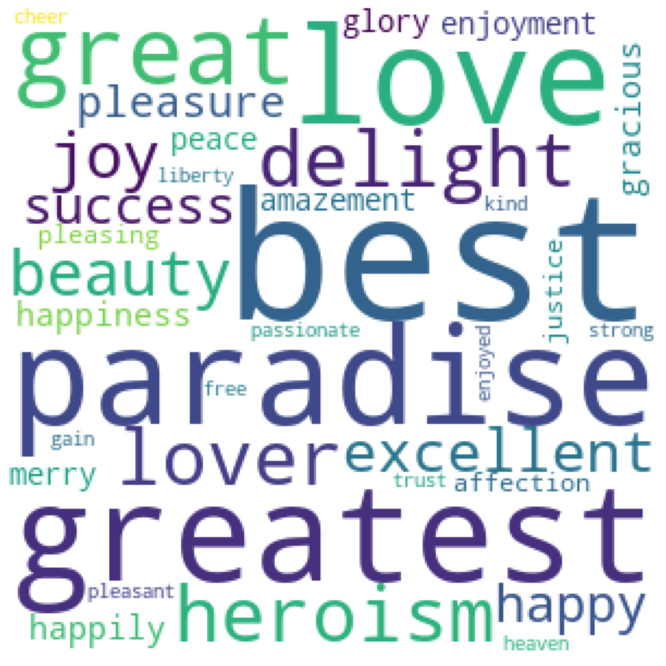

In [8]:
#generate a basic wordcloud for positive word sentiment strength
mariaposwordsent = pd.Series(mariapos_df.wordsent.values,index=mariapos_df.wordlist).to_dict()
mariaposwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(mariaposwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(mariaposwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

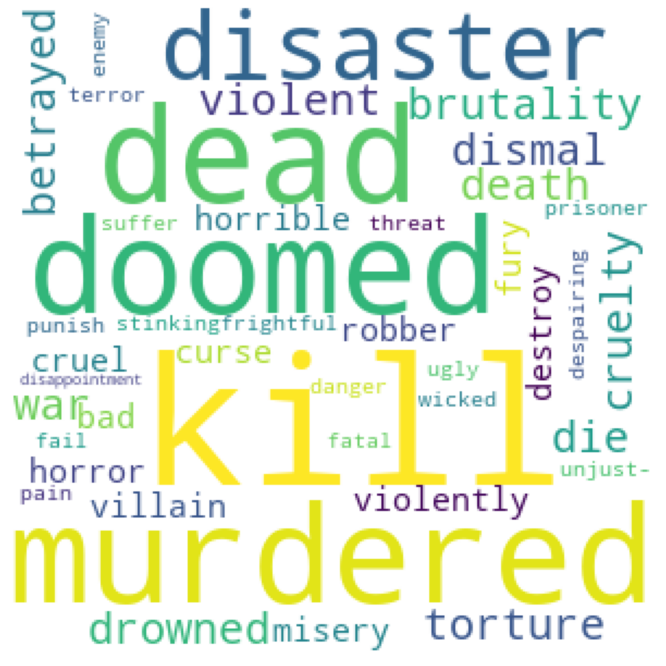

In [9]:
#generate a basic wordcloud for negatve word sentiment strength
marianegwordsent = pd.Series((marianeg_df.wordsent.values*-1),index=marianeg_df.wordlist).to_dict()
marianegwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(marianegwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(marianegwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [10]:
#split text into sentences
mariasentences = tokenize.sent_tokenize(maria)

#turn list of sentences into a dataframe
mariasentences_df = pd.DataFrame (mariasentences, columns = ['sentence'])

# Purge weird sentences
mariasentences_df = mariasentences_df.drop(mariasentences_df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]])

#find sentiment of each sentence
k = 0
mariasentencesentiment_df = []
maria_sentence = []
for index, row in mariasentences_df.iterrows():
    while k < 50:
        sentence = mariasentences_df["sentence"].iloc[k]
        # print(mariasentences_df["sentence"].iloc[k])
        # print(sia.polarity_scores(sentence))
        # print('Sentence ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(sentence)["compound"]))
        mariasentencesentiment_df.append(sia.polarity_scores(sentence)["compound"])
        maria_sentence.append(sentence)
        k+=1

maria_sentence_sentiment_df = pd.DataFrame({'sentence':maria_sentence, 'sentiment':mariasentencesentiment_df})
maria_sentence_sentiment_df[:30]

,sentence,sentiment
0,"I AM a native of England, and was\nborn in the...",0.6597
1,"In the year 1797, I was\nmarried to captain He...",0.0000
2,Being ever desirous\nof visiting some distant ...,0.4939
3,"Accordingly, on the twen.",0.0000
4,"tieth of June 1800, we set sail in the ship\nU...",0.0000
5,"We enjoyed for several\nweeks a pleasant wind,...",0.6800
6,Our amazement and horror cannot be dea\nscribe...,-0.0516
7,We\nwere soon overwhelmed by the tempest\nof t...,0.0516
8,The crew were in the ut.,0.0000
9,"most confusion-some swearing, and\nothers pray...",0.0571


<AxesSubplot:ylabel='Frequency'>

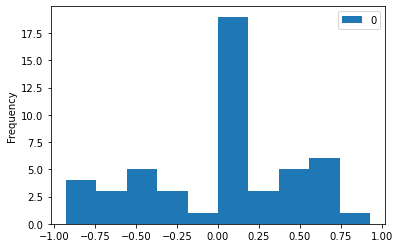

In [11]:
# put compound polarity scores in a dataframe
mariacompound_df = pd.DataFrame(mariasentencesentiment_df[:50])

#histogram of the compound polarity scores
mariacompound_df.plot(kind='hist')

## Thomas Pellow Text - Sentiment Analysis

In [12]:
#open text file in read mode
pellow_file = open('Thomas Pellow.txt', "r")
 
#read whole file to a string
pellow = pellow_file.read()
 
#close file
pellow_file.close()
 
#print(pellow)

In [13]:
# Thomas Pellow text polarity score
sia.polarity_scores(pellow)

{'neg': 0.081, 'neu': 0.803, 'pos': 0.117, 'compound': 1.0}

In [14]:
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(pellow.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
pellow_df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

# Purge weird words
pellow_df = pellow_df.drop(pellow_df.index[[0,1,2,3,7,16,23,3425,7015,2735]])
#pellow_df[:30]

In [15]:
# Sentiment value of each word
k = 0
pellowwordlist = []
pellowwords_sentiments = []
for index, row in pellow_df.iterrows():
    word = pellow_df["wordlist"].iloc[k]
    pellowwords_sentiments.append(sia.polarity_scores(word)["compound"])
    pellowwordlist.append(word)
    k+=1

pellowwords_sentiments_df = pd.DataFrame({'wordlist':pellowwordlist, 'wordsent':pellowwords_sentiments})
#pellowwords_sentiments_df[:30]

In [16]:
# Find the most polarizing words - negative and positive
k = 0
pellowpos_words = []
pellowneg_words = []
pellowpos_word_sentiments = []
pellowneg_word_sentiments = []
for index, row in pellowwords_sentiments_df.iterrows():
    word = pellowwords_sentiments_df["wordlist"].iloc[k]
    if pellowwords_sentiments_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        pellowpos_word_sentiments.append(sia.polarity_scores(word)["compound"])
        pellowpos_words.append(word)
        #print("The most positive words are:")
    elif pellowwords_sentiments_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        pellowneg_word_sentiments.append(sia.polarity_scores(word)["compound"])
        pellowneg_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
pellowpos_df = pd.DataFrame({'wordlist':pellowpos_words, 'wordsent':pellowpos_word_sentiments})
pellowpos_df = pellowpos_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (pellowpos_df[:30])
pellowneg_df = pd.DataFrame({'wordlist':pellowneg_words, 'wordsent':pellowneg_word_sentiments})
pellowneg_df = pellowneg_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (pellowneg_df[:30])

The positive words are:
           wordlist  wordsent
95          ecstacy    0.6486
44        perfectly    0.6369
55         paradise    0.6369
1              best    0.6369
30         glorious    0.6369
6          greatest    0.6369
81         lovingly    0.6369
23             love    0.6369
18          freedom    0.6369
0             great    0.6249
87           joyous    0.6249
109     masterpiece    0.6249
101     exhilarated    0.6124
98      magnificent    0.5994
45      wonderfully    0.5994
112  congratulation    0.5994
58          blessed    0.5994
65           loving    0.5994
118      delightful    0.5859
103         miracle    0.5859
43        rejoicing    0.5859
121       brilliant    0.5859
57           beauty    0.5859
119        splendid    0.5859
76              win    0.5859
41       successful    0.5859
115         amazing    0.5859
22              joy    0.5859
82          reward.    0.5719
75        delicious    0.5719
The negative words are:
         wordlist  wor

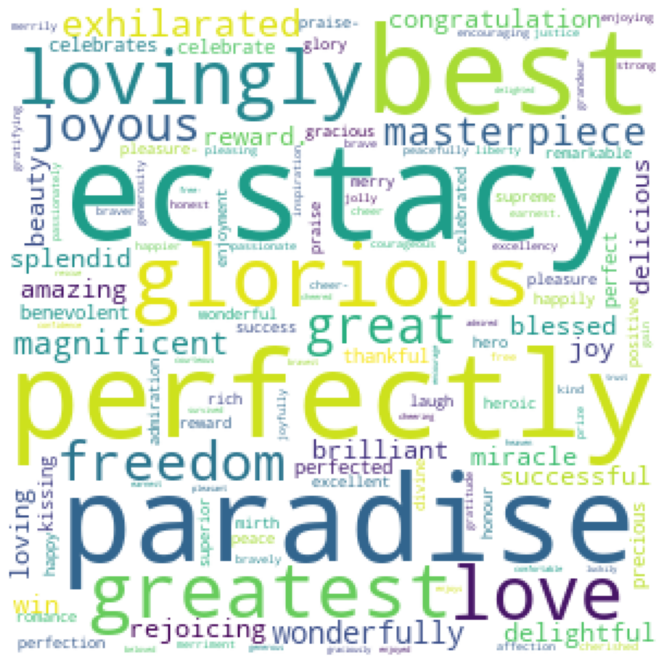

In [17]:
#generate a basic wordcloud for positive word sentiment strength
pellowposwordsent = pd.Series(pellowpos_df.wordsent.values,index=pellowpos_df.wordlist).to_dict()
pellowposwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(pellowposwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(pellowposwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

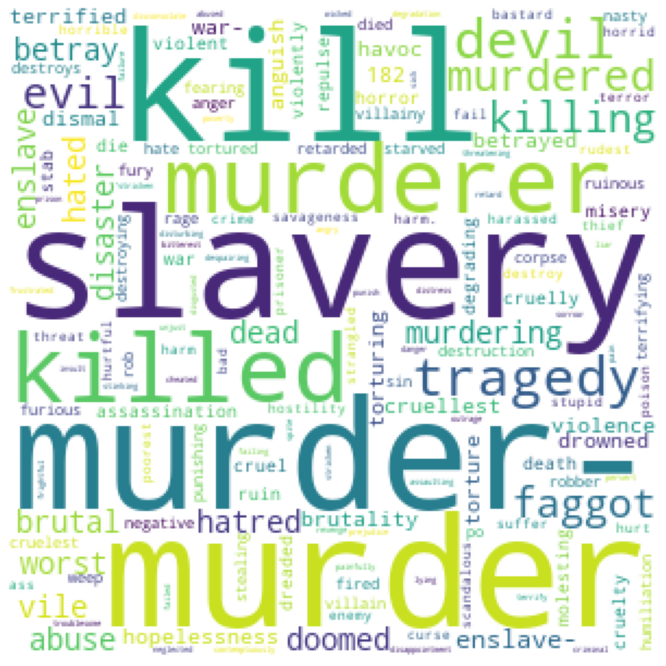

In [18]:
#generate a basic wordcloud for negatve word sentiment strength
pellownegwordsent = pd.Series((pellowneg_df.wordsent.values*-1),index=pellowneg_df.wordlist).to_dict()
pellownegwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(pellownegwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(pellownegwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [19]:
#split text into sentences
pellowsentences = tokenize.sent_tokenize(pellow)

#turn list of sentences into a dataframe
pellowsentences_df = pd.DataFrame (pellowsentences, columns = ['sentence'])

# Purge weird sentences
pellowsentences_df = pellowsentences_df.drop(pellowsentences_df.index[
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
    39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,61,62,65,66,69,70,71,72,73,74,75,76,80,81,82,83,84,85,
    86,87,88,91,92,93,94,95,96,99,100,101,102,106,107,108,109,110,111,112,113,116,117,118,119,120,121,122,123,126,
    127,128,129,130,131,132,136,137,58,67,89,97,103,114,124,133,138,142,145,146,147,148,149,150,151,152,153,154,155,
    156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,
    184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207]]) 
#pellowsentences_df[:30]

#find sentiment of each sentence
k = 0
pellowsentencesentiment_df = []
pellow_sentence = []
for index, row in pellowsentences_df.iterrows():
    while k < 50:
        sentence = pellowsentences_df["sentence"].iloc[k]
        # print(mariasentences_df["sentence"].iloc[k])
        # print(sia.polarity_scores(sentence))
        # print('Sentence ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(sentence)["compound"]))
        pellowsentencesentiment_df.append(sia.polarity_scores(sentence)["compound"])
        pellow_sentence.append(sentence)
        k+=1

pellow_sentence_sentiment_df = pd.DataFrame({'sentence':pellow_sentence, 'sentiment':pellowsentencesentiment_df})
pellow_sentence_sentiment_df[:30]

,sentence,sentiment
0,7\n(2) The Adventures of Thomas Pellow :-\nCHA...,0.3400
1,Mr. Pellow is better housed and higher in favo...,-0.4404
2,His lazy life during six-years-He\nmarches to ...,-0.3612
3,The Emperor's troops surprise the castle of Eh...,-0.9371
4,less of the law-Wild beasts and their ways .,0.0000
5,"Mr. Pellow goes with the troops to Guzlan, and...",-0.8824
6,110\nCHAPTER V.\nThe rise of Muley Ismaïl–His ...,-0.4404
7,"PAGE\nHis Bokhari, or Black Guards—His esteem ...",0.0000
8,The story of an attempted assassination of him...,-0.8316
9,Mr. Pellow makes a determined attempt to escap...,-0.8658


<AxesSubplot:ylabel='Frequency'>

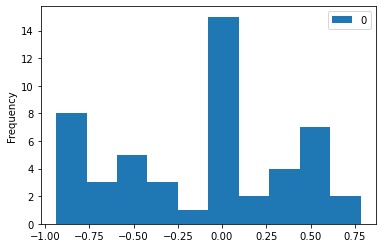

In [20]:
# put compound polarity scores in a dataframe
pellowcompound_df = pd.DataFrame(pellowsentencesentiment_df[:50])

#histogram of the compound polarity scores
pellowcompound_df.plot(kind='hist')

## Thomas Phelps Text - Sentiment Analysis

In [21]:
# open file in read mode
phelps_file = open('Thomas Pellow.txt', "r")
 
#read whole file to a string
phelps = phelps_file.read()
 
#close file
phelps_file.close()
 
#print(phelps)

In [22]:
# Thomas Phelps text polarity score
sia.polarity_scores(phelps)

{'neg': 0.081, 'neu': 0.803, 'pos': 0.117, 'compound': 1.0}

In [23]:
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(phelps.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
phelps_df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

# Purge weird words
phelps_df = phelps_df.drop(phelps_df.index[[0,1,2,3,7,16,23,3425,7015,2735]])
#phelps_df[:30]

In [24]:
# Sentiment value of each word
k = 0
phelpswordlist = []
phelpswords_sentiments = []
for index, row in phelps_df.iterrows():
    word = phelps_df["wordlist"].iloc[k]
    phelpswords_sentiments.append(sia.polarity_scores(word)["compound"])
    phelpswordlist.append(word)
    k+=1

phelpswords_sentiments_df = pd.DataFrame({'wordlist':phelpswordlist, 'wordsent':phelpswords_sentiments})
#phelpswords_sentiments_df[:30]

In [25]:
# Find the most polarizing words - negative and positive
k = 0
phelpspos_words = []
phelpsneg_words = []
phelpspos_word_sentiments = []
phelpsneg_word_sentiments = []
for index, row in phelpswords_sentiments_df.iterrows():
    word = phelpswords_sentiments_df["wordlist"].iloc[k]
    if phelpswords_sentiments_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        phelpspos_word_sentiments.append(sia.polarity_scores(word)["compound"])
        phelpspos_words.append(word)
        #print("The most positive words are:")
    elif phelpswords_sentiments_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        phelpsneg_word_sentiments.append(sia.polarity_scores(word)["compound"])
        phelpsneg_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
phelpspos_df = pd.DataFrame({'wordlist':phelpspos_words, 'wordsent':phelpspos_word_sentiments})
phelpspos_df = phelpspos_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (phelpspos_df[:30])
phelpsneg_df = pd.DataFrame({'wordlist':phelpsneg_words, 'wordsent':phelpsneg_word_sentiments})
phelpsneg_df = phelpsneg_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (phelpsneg_df[:30])

The positive words are:
           wordlist  wordsent
95          ecstacy    0.6486
44        perfectly    0.6369
55         paradise    0.6369
1              best    0.6369
30         glorious    0.6369
6          greatest    0.6369
81         lovingly    0.6369
23             love    0.6369
18          freedom    0.6369
0             great    0.6249
87           joyous    0.6249
109     masterpiece    0.6249
101     exhilarated    0.6124
98      magnificent    0.5994
45      wonderfully    0.5994
112  congratulation    0.5994
58          blessed    0.5994
65           loving    0.5994
118      delightful    0.5859
103         miracle    0.5859
43        rejoicing    0.5859
121       brilliant    0.5859
57           beauty    0.5859
119        splendid    0.5859
76              win    0.5859
41       successful    0.5859
115         amazing    0.5859
22              joy    0.5859
82          reward.    0.5719
75        delicious    0.5719
The negative words are:
         wordlist  wor

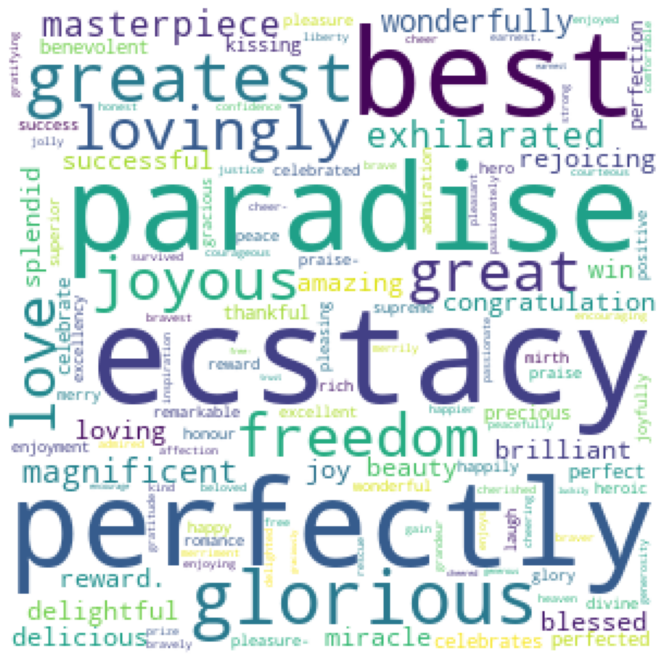

In [26]:
#generate a basic wordcloud for positive word sentiment strength
phelpsposwordsent = pd.Series(phelpspos_df.wordsent.values,index=phelpspos_df.wordlist).to_dict()
phelpsposwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(phelpsposwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(phelpsposwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

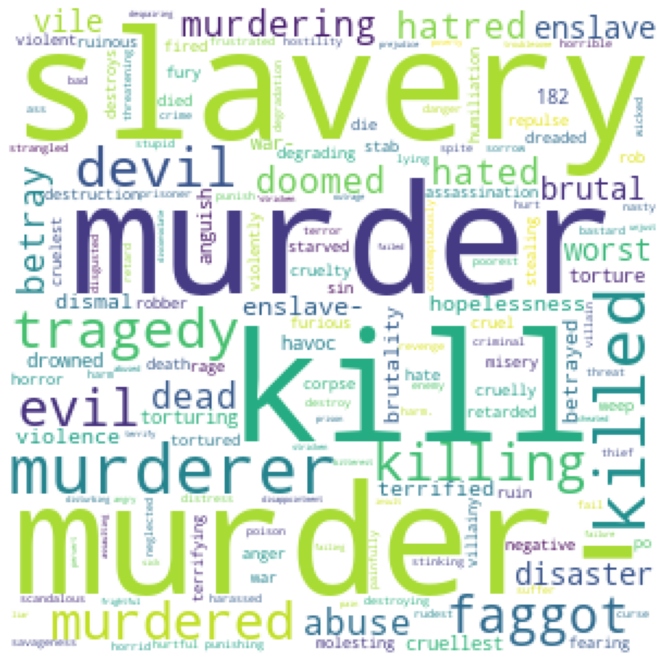

In [27]:
#generate a basic wordcloud for negatve word sentiment strength
phelpsnegwordsent = pd.Series((phelpsneg_df.wordsent.values*-1),index=phelpsneg_df.wordlist).to_dict()
phelpsnegwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(phelpsnegwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(phelpsnegwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [28]:
#split text into sentences
phelpssentences = tokenize.sent_tokenize(phelps)

#turn list of sentences into a dataframe
phelpssentences_df = pd.DataFrame (phelpssentences, columns = ['sentence'])

# Purge weird sentences
phelpssentences_df = phelpssentences_df.drop(phelpssentences_df.index[
     [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
      30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,
      61,62,65,66,67,69,70,71,72,73,74,75,76,80,81,82,83,84,85,86,87,88,89,91,92,93,94,
      95,96,97,99,100,101,102,103,106,107,108,109,110,111,112,113,114,116,117,118,119,120,
     121,122,123,124,126,127,128,129,130,131,132,133,136,137,138,142,145,146,147,148,149,
      150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,
     173,175,177,171,172,176,178,179,180,181,182,183,186,189,190,192,193,194]]) 
#phelpssentences_df[:30]

#find sentiment of each sentence
k = 0
phelpssentencesentiment_df = []
phelps_sentence = []
for index, row in phelpssentences_df.iterrows():
    while k < 50:
        sentence = phelpssentences_df["sentence"].iloc[k]
        # print(mariasentences_df["sentence"].iloc[k])
        # print(sia.polarity_scores(sentence))
        # print('Sentence ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(sentence)["compound"]))
        phelpssentencesentiment_df.append(sia.polarity_scores(sentence)["compound"])
        phelps_sentence.append(sentence)
        k+=1

phelps_sentence_sentiment_df = pd.DataFrame({'sentence':phelps_sentence, 'sentiment':phelpssentencesentiment_df})
phelps_sentence_sentiment_df[:30]

,sentence,sentiment
0,7\n(2) The Adventures of Thomas Pellow :-\nCHA...,0.3400
1,The Author; youth and schooling-He goes to 808...,-0.9674
2,Mr. Pellow is better housed and higher in favo...,-0.4404
3,His lazy life during six-years-He\nmarches to ...,-0.3612
4,The Emperor's troops surprise the castle of Eh...,-0.9371
5,less of the law-Wild beasts and their ways .,0.0000
6,"Mr. Pellow goes with the troops to Guzlan, and...",-0.8824
7,110\nCHAPTER V.\nThe rise of Muley Ismaïl–His ...,-0.4404
8,"PAGE\nHis Bokhari, or Black Guards—His esteem ...",0.0000
9,The story of an attempted assassination of him...,-0.8316


<AxesSubplot:ylabel='Frequency'>

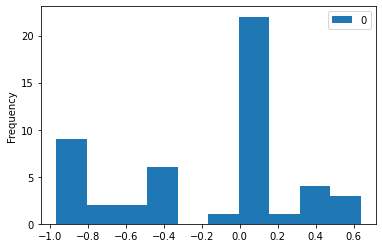

In [29]:
# put compound polarity scores in a dataframe
phelpscompound_df = pd.DataFrame(phelpssentencesentiment_df[:50])

#histogram of the compound polarity scores
phelpscompound_df.plot(kind='hist')

## Updike Underhill Text - Sentiment Analysis

In [30]:
# open file in read mode
updike_file = open('Updike.txt', "r")
 
#read whole file to a string
updike = updike_file.read()
 
#close file
updike_file.close()
 
#print(updike)

In [31]:
# Updike Underhill text polarity score
sia.polarity_scores(updike)

{'neg': 0.089, 'neu': 0.777, 'pos': 0.134, 'compound': 1.0}

In [32]:
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(updike.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
updike_df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})

# Purge weird words
updike_df = updike_df.drop(updike_df.index[[0,5,2690,4252,2784]])
#updike_df[:30]

In [33]:
# Sentiment value of each word
k = 0
updikewordlist = []
updikewords_sentiments = []
for index, row in updike_df.iterrows():
    word = updike_df["wordlist"].iloc[k]
    updikewords_sentiments.append(sia.polarity_scores(word)["compound"])
    updikewordlist.append(word)
    k+=1

updikewords_sentiments_df = pd.DataFrame({'wordlist':updikewordlist, 'wordsent':updikewords_sentiments})
#updikewords_sentiments_df[:30]

In [34]:
# Find the most polarizing words - negative and positive
k = 0
updikepos_words = []
updikeneg_words = []
updikepos_word_sentiments = []
updikeneg_word_sentiments = []
for index, row in updikewords_sentiments_df.iterrows():
    word = updikewords_sentiments_df["wordlist"].iloc[k]
    if updikewords_sentiments_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        updikepos_word_sentiments.append(sia.polarity_scores(word)["compound"])
        updikepos_words.append(word)
        #print("The most positive words are:")
    elif updikewords_sentiments_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        updikeneg_word_sentiments.append(sia.polarity_scores(word)["compound"])
        updikeneg_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
updikepos_df = pd.DataFrame({'wordlist':updikepos_words, 'wordsent':updikepos_word_sentiments})
updikepos_df = updikepos_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (updikepos_df[:30])
updikeneg_df = pd.DataFrame({'wordlist':updikeneg_words, 'wordsent':updikeneg_word_sentiments})
updikeneg_df = updikeneg_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (updikeneg_df[:30])

The positive words are:
           wordlist  wordsent
135       perfectly    0.6369
10          freedom    0.6369
2              love    0.6369
121          elated    0.6369
50         greatest    0.6369
27         glorious    0.6369
26         paradise    0.6369
24             best    0.6369
112      excellence    0.6249
0             great    0.6249
68        brightest    0.6124
84      exhilarated    0.6124
54         splendor    0.6124
83         heavenly    0.6124
34          delight    0.5994
46        beautiful    0.5994
69      wonderfully    0.5994
70            loved    0.5994
21          blessed    0.5994
81         divinely    0.5994
85      magnificent    0.5994
109      gloriously    0.5994
111       adoration    0.5994
116  congratulation    0.5994
97       delightful    0.5859
107         amazing    0.5859
43           beauty    0.5859
76        brilliant    0.5859
110            win-    0.5859
66        rejoicing    0.5859
The negative words are:
      wordlist  wordse

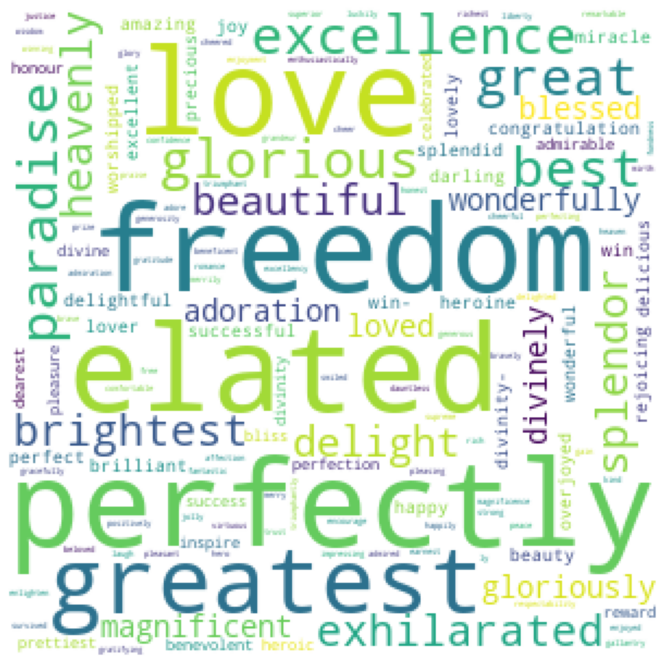

In [35]:
#generate a basic wordcloud for positive word sentiment strength
updikeposwordsent = pd.Series(updikepos_df.wordsent.values,index=updikepos_df.wordlist).to_dict()
updikeposwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(updikeposwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(updikeposwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

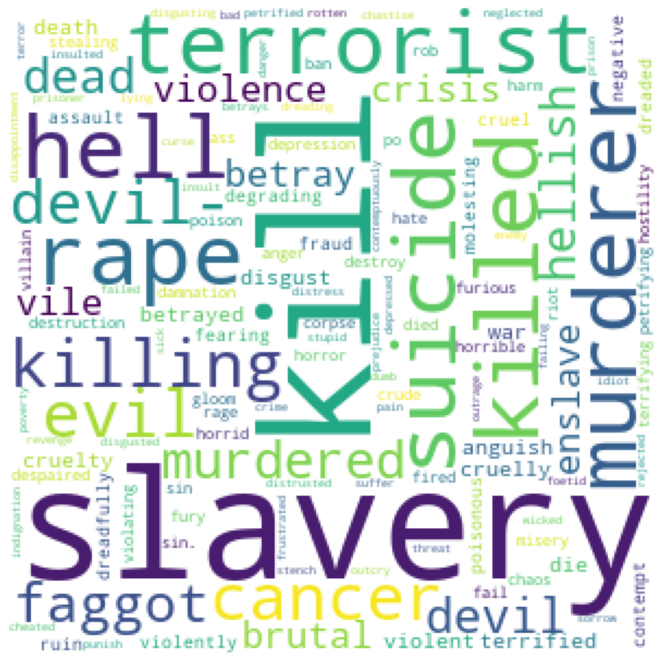

In [36]:
#generate a basic wordcloud for negatve word sentiment strength
updikenegwordsent = pd.Series((updikeneg_df.wordsent.values*-1),index=updikeneg_df.wordlist).to_dict()
updikenegwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(updikenegwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(updikenegwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [37]:
#split text into sentences
updikesentences = tokenize.sent_tokenize(updike)

#turn list of sentences into a dataframe
updikesentences_df = pd.DataFrame (updikesentences, columns = ['sentence'])

# Purge weird sentences
updikesentences_df = updikesentences_df.drop(updikesentences_df.index[
     [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
      25,50,51,52,54,55,59]])
#updikesentences_df[:30]

#find sentiment of each sentence
k = 0
updikesentencesentiment_df = []
updike_sentence = []
for index, row in updikesentences_df.iterrows():
    while k < 50:
        sentence = updikesentences_df["sentence"].iloc[k]
        # print(mariasentences_df["sentence"].iloc[k])
        # print(sia.polarity_scores(sentence))
        # print('Sentence ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(sentence)["compound"]))
        updikesentencesentiment_df.append(sia.polarity_scores(sentence)["compound"])
        updike_sentence.append(sentence)
        k+=1

updike_sentence_sentiment_df = pd.DataFrame({'sentence':updike_sentence, 'sentiment':updikesentencesentiment_df})
updike_sentence_sentiment_df[:30]

,sentence,sentiment
0,ONE of the first observations the author of th...,0.3612
1,"When he left New Eng \n land, books of biograp...",-0.4939
2,"On \n his return from captivity, he found a su...",0.2732
3,"In our inland towns \n of consequence, social ...",0.4019
4,The diffusion of a taste for any species of \n...,0.0000
5,The pea \n sant of Europe must first be taught...,0.0000
6,"In New England, \n the work is half completed.",0.0000
7,In no other country \n \n \n\n## p. (#10) ####...,-0.2960
8,"are there so many people, who, in proportion t...",0.6369
9,The wor \n thy farmer no longer fatigued himse...,-0.9490


<AxesSubplot:ylabel='Frequency'>

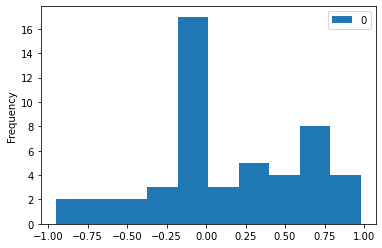

In [38]:
# put compound polarity scores in a dataframe
updikecompound_df = pd.DataFrame(updikesentencesentiment_df[:50])

#histogram of the compound polarity scores
updikecompound_df.plot(kind='hist')